In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# this will remove the warnings 
import warnings
warnings.filterwarnings("ignore")

#loading the dataset
#you can download the dataset from kaggle link:- https://www.kaggle.com/gilsousa/habermans-survival-data-set/data
#loading the dataset
df = pd.read_csv('haberman.csv')

In [65]:
print(df.shape)

(305, 4)


In [66]:
df.head

<bound method NDFrame.head of      30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]>

In [67]:
print(df.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [68]:
#we will have to rename the columns to make it easier for us to understand the attributes
df = df.rename(columns={'30':'age', '64':'opyr','1':'axil_nodes','1.1':'surv_status'})

In [69]:
df
#age is age of person, opyr is the year in which his/her operation was done, 
# axil_nodes is Axillary lymph nodes are the lymph nodes located in the armpits. 
# They can become enlarged in many conditions including infections, lymphomas, and breast cancers . 
# Lymph nodes are small structures located all over the body around blood vessels that act as
# filters and can accumulate germs or cancer cells
# surv_status has two values 1 means a person has survived 5 years or more and 2 means he/she has survived for less than 5 years

,age,opyr,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [70]:
df.columns


Index(['age', 'opyr', 'axil_nodes', 'surv_status'], dtype='object')

In [71]:
df['opyr'].value_counts()

58    36
64    30
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: opyr, dtype: int64

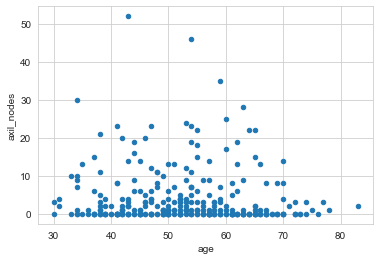

In [72]:
df.plot(kind='scatter', x='age',y='axil_nodes');

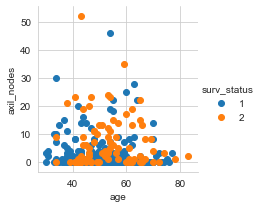

In [73]:
# we can see that points are overlapping and more number of points are having axil_nodes less than 30
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='surv_status') \
.map(plt.scatter, "age","axil_nodes") \
.add_legend()
plt.show()

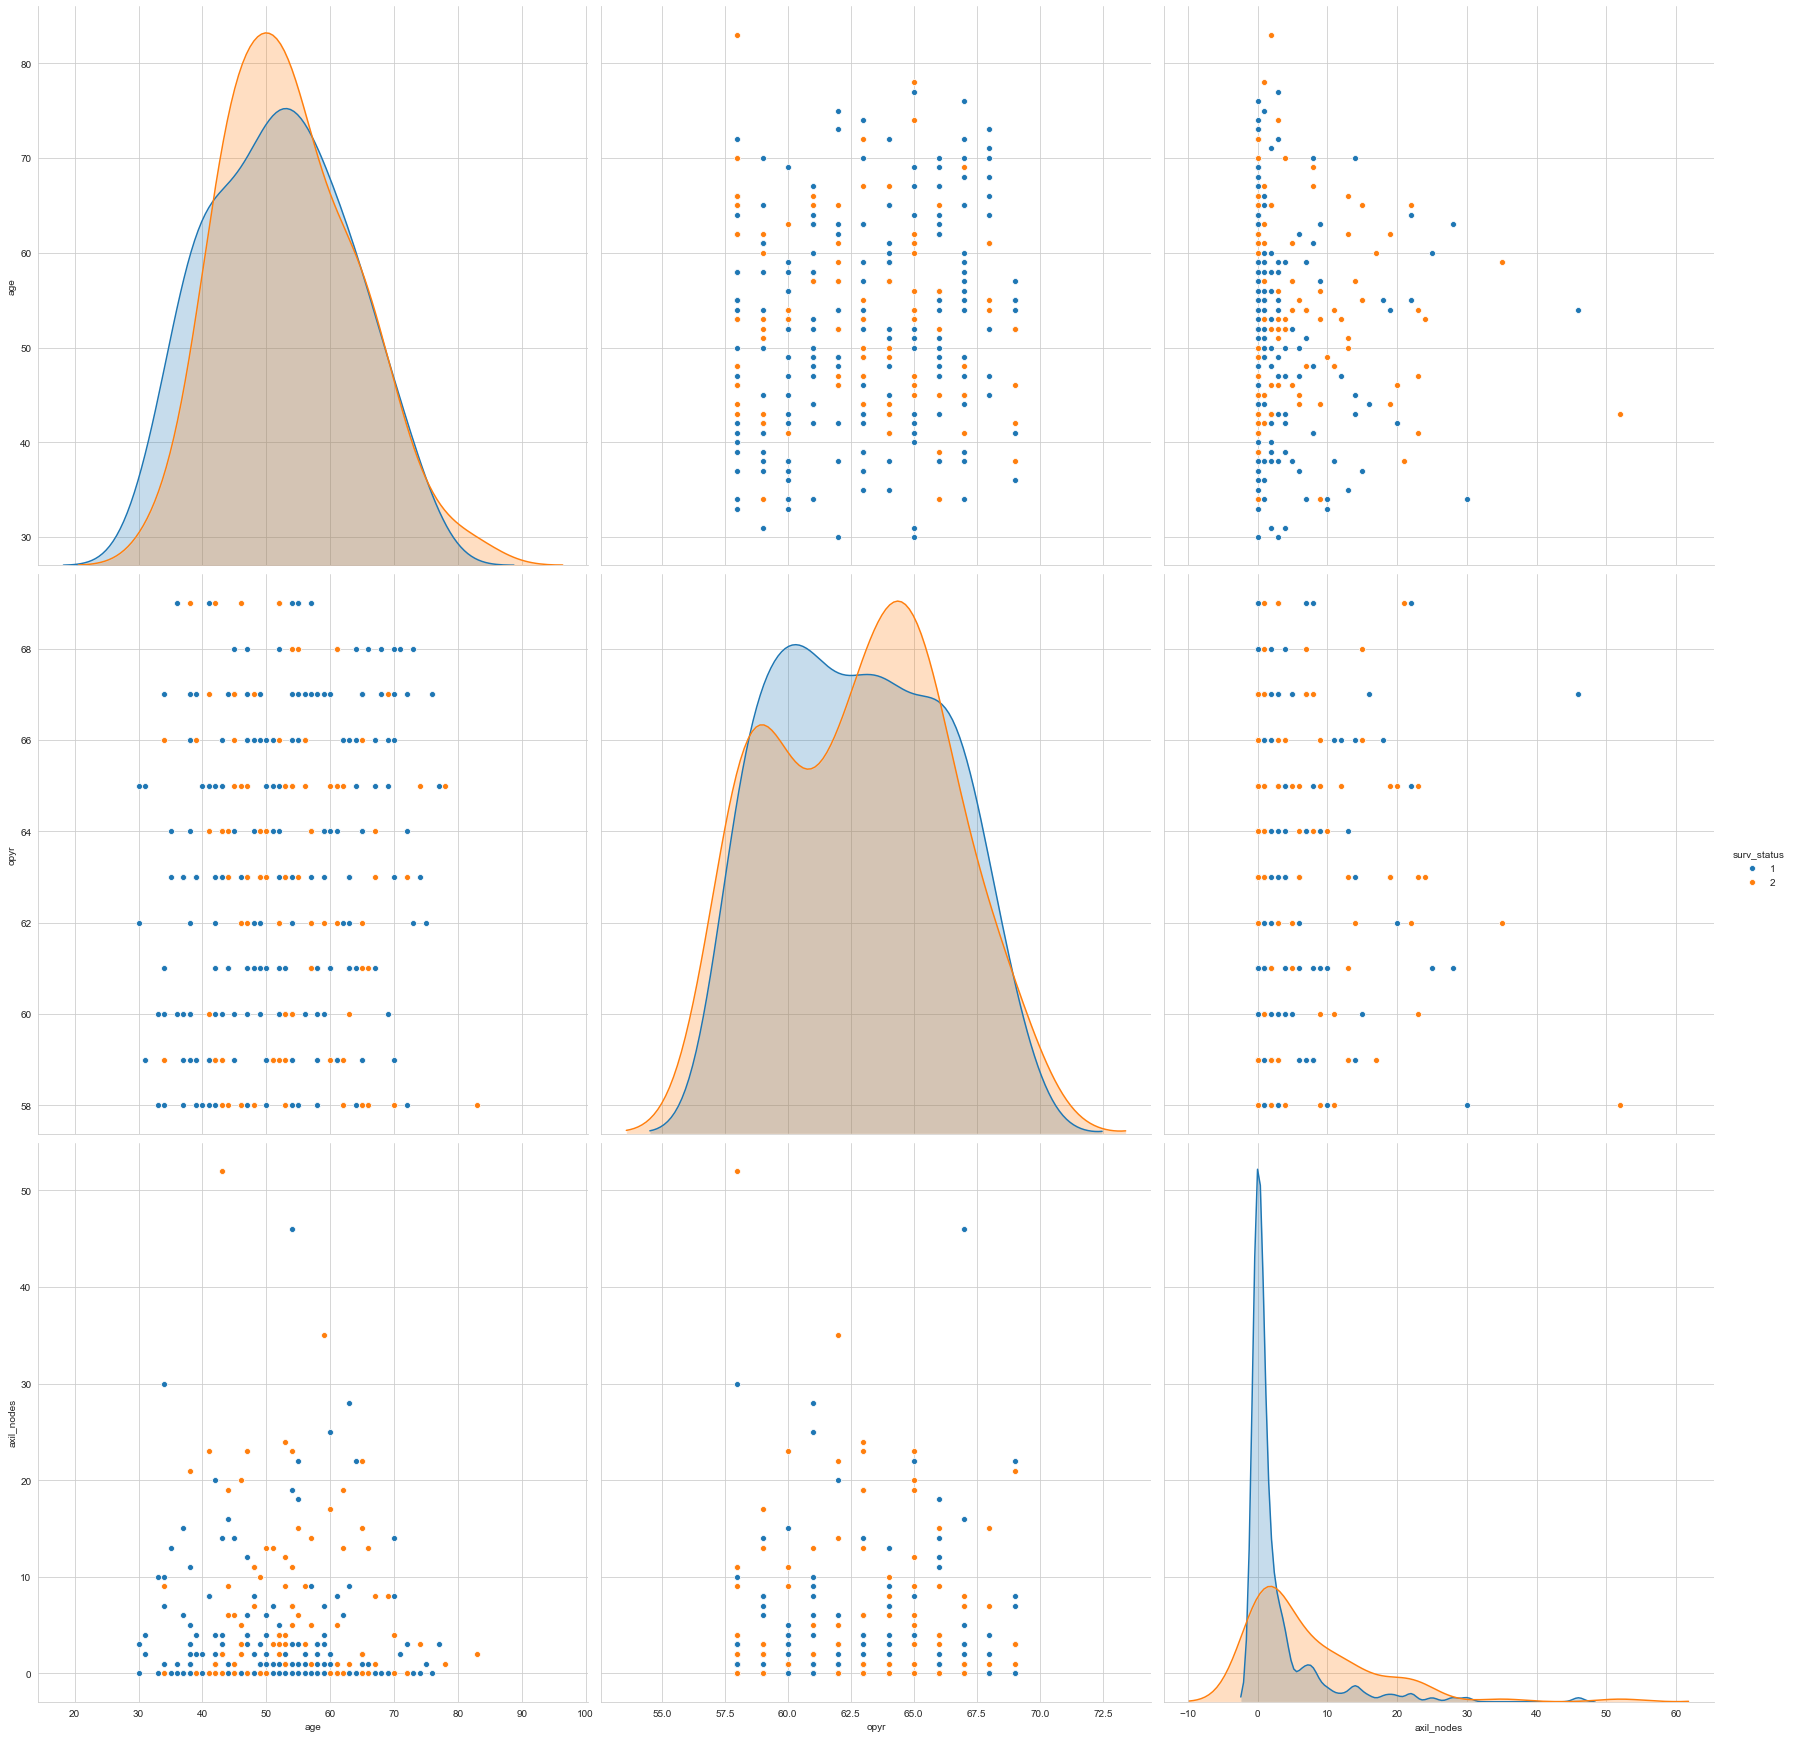

In [134]:
# Pairplot for the dataset 
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="surv_status",size=8)
plt.show()

In [ ]:
# There is lot of overlapping therefore it is difficult to predict the output 
# They can't be classified linearly 
# Therefore we will need to use non-linear models

# axil_nodes is the most useful feature, then comes opyr and then the age 
# axil_nodes > opyr > age

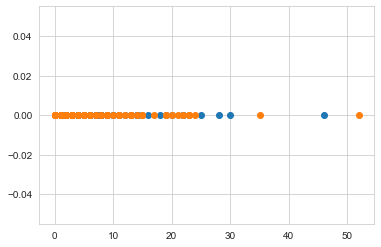

In [49]:
import numpy as np

morefive = df.loc[df["surv_status"]==1 ];
lessfive = df.loc[df["surv_status"] ==2 ];

plt.plot(morefive['axil_nodes'],np.zeros_like(morefive['axil_nodes']),'o')
plt.plot(lessfive['axil_nodes'],np.zeros_like(lessfive['axil_nodes']),'o')

plt.show()

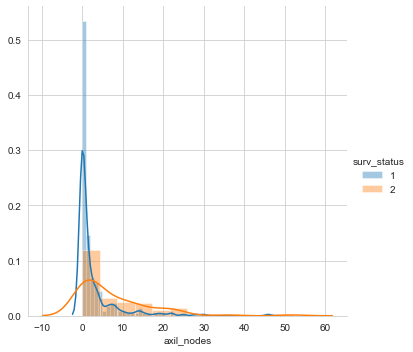

In [52]:
sns.FacetGrid(df, hue='surv_status', size=5)\
.map(sns.distplot,'axil_nodes') \
.add_legend()
plt.show()

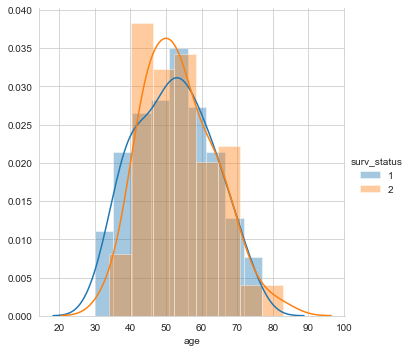

In [97]:
sns.FacetGrid(df, hue='surv_status', size=5)\
.map(sns.distplot,'age') \
.add_legend()
plt.show()

In [98]:
# 1. It can be seen that most values are overlapping 
# 2. But we can conclude that people from 40 to 60 years of age are more likely to die
# 3. People of age less than 40 are more likely to survive

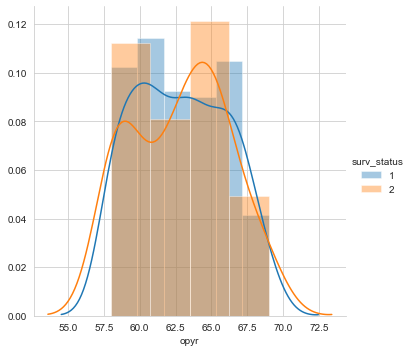

In [100]:
sns.FacetGrid(df, hue='surv_status', size=5)\
.map(sns.distplot,'opyr') \
.add_legend()
plt.show()

In [ ]:
# 1. Overlapping is there between the two classes
# 2. Most people with operation between 57 to 67 were not able to survive

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


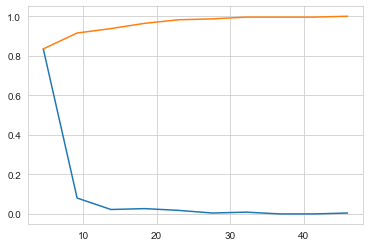

In [101]:
# pdf and cdf plot for axil_nodes

counts , bin_edges = np.histogram(morefive['axil_nodes'],bins=10,
                                 density=True)
pdf=counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] , cdf)
plt.show()

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


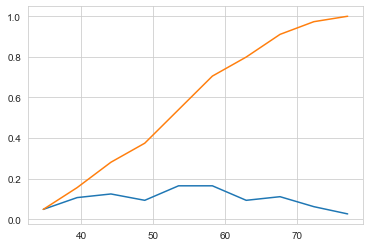

In [103]:
# pdf and cdf plot for age of the person

counts , bin_edges = np.histogram(morefive['age'],bins=10,
                                 density=True)
pdf=counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] , cdf)
plt.show()

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


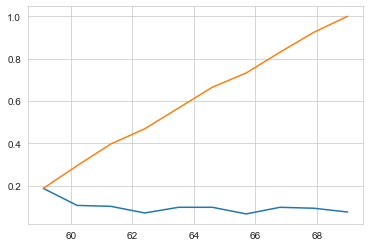

In [105]:
# pdf and cdf plot for operation year

counts , bin_edges = np.histogram(morefive['opyr'],bins=10,
                                 density=True)
pdf=counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] , cdf)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


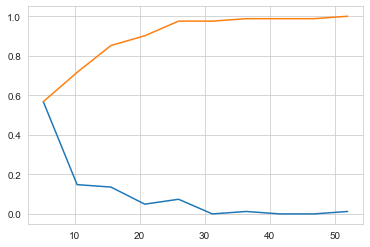

In [106]:
# pdf and cdf plot for axil_nodes

counts , bin_edges = np.histogram(lessfive['axil_nodes'],bins=10,
                                 density=True)
pdf=counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] , cdf)
plt.show()

In [81]:
# Mean, Variance and standardDeviation
print("Mean")
print(np.mean(morefive['axil_nodes']))
print(np.mean(morefive['age']))
print(np.mean(morefive['opyr']))

print()

# std
print(np.std(morefive["axil_nodes"]))
print(np.std(morefive["age"]))
print(np.std(morefive["opyr"]))


Mean
2.799107142857143
52.11607142857143
62.857142857142854

5.869092706952767
10.913004640364269
3.2220145175061514


In [85]:
# Median
print(np.median(morefive['axil_nodes']))
print(np.median(morefive['age']))
print(np.median(morefive['opyr']))

0.0
52.0
63.0


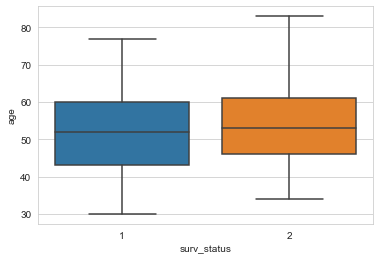

In [108]:
# Boxplot for age 
sns.boxplot(x='surv_status',y='age',data=df)
plt.show()

In [109]:
# It shows that more than 90 percentage of points are overlapping
 # Therefore age is not sufficient for determing the output

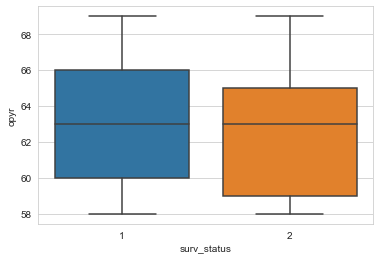

In [115]:
# Boxplot for operation year
sns.boxplot(x='surv_status',y='opyr',data=df)
plt.show()

In [ ]:
# Operation year is also not sufficient to determine the output

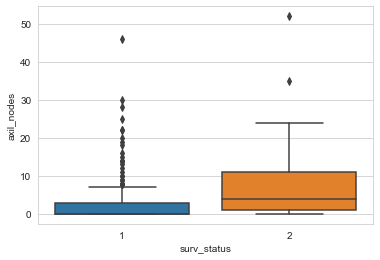

In [114]:
# Boxplot for axil nodes
sns.boxplot(x='surv_status',y='axil_nodes',data=df)
plt.show()

In [ ]:
# There are many outliers 

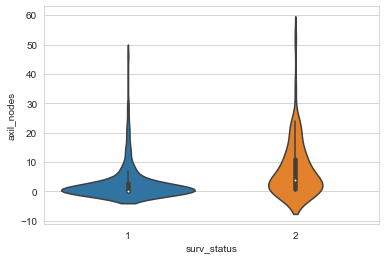

In [116]:
# voilinPlot
sns.violinplot(x='surv_status',y='axil_nodes',data=df,size=8)
plt.show()

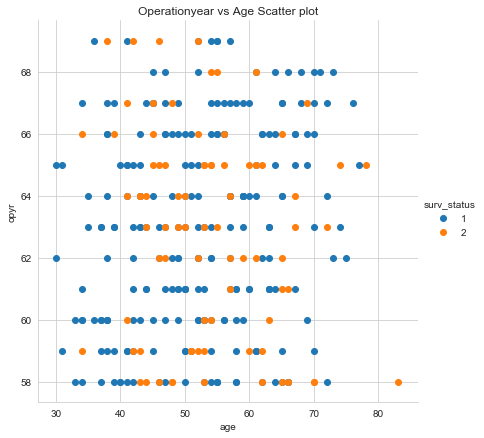

In [130]:
sns.set_style("whitegrid") 
sns.FacetGrid(df,hue='surv_status',size = 6) \
.map(plt.scatter,'age','opyr') \
.add_legend() 
plt.title("Operationyear vs Age Scatter plot") 
plt.show()